<a href="https://colab.research.google.com/github/Megh-Zyke/Copy-of-ResNet/blob/main/Toy_Resnet_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Introduction: Small ResNet on CIFAR-10 Dataset**

## Overview
This project implements a smaller version of a ResNet architecture using the Keras deep learning library. The ResNet is trained on the CIFAR-10 dataset, a well-known benchmark dataset for image classification. The goal is to explore the capabilities of a simplified ResNet architecture on a more complex dataset and achieve accurate classification on diverse images.

## CIFAR-10 Dataset Analysis

### About CIFAR-10
CIFAR-10 is a dataset of 60,000 32x32 color images in 10 different classes, with 6,000 images per class. The dataset is commonly used for benchmarking image classification models. The classes in CIFAR-10 are as follows:
1. Airplane
2. Automobile
3. Bird
4. Cat
5. Deer
6. Dog
7. Frog
8. Horse
9. Ship
10. Truck

### Dataset Characteristics
- **Image Size:** 32x32 pixels
- **Color Channels:** RGB (3 channels)
- **Number of Classes:** 10
- **Number of Images:** 60,000 (50,000 for training, 10,000 for testing)
- **Class Balance:** Each class has an equal number of images.


The first step is importing the necessary libraries which are used for recreating the ResNet. The libraries which are used are
1. **TensorFlow:**
   - Open-source machine learning framework for building and deploying deep learning models, developed by Google.

2. **Keras:**
   - High-level neural networks API in Python, designed for easy prototyping and running on top of TensorFlow, Theano, or CNTK.

3. **NumPy:**
   - Fundamental Python library for numerical computing, offering support for large arrays and matrices, essential for scientific computing and machine learning.

In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# Importing Dataset from Keras

## Overview
In this step, we leverage the `keras.datasets` module to import the CIFAR-10 dataset. Keras conveniently provides a collection of popular datasets for machine learning tasks. The CIFAR-10 dataset, containing 60,000 32x32 color images across 10 classes, is a widely-used benchmark for image classification.

## Dataset Loading
Keras simplifies the process of obtaining the CIFAR-10 dataset. By using the `load_data` function from `keras.datasets.cifar10`, the dataset is automatically downloaded if not already available locally. It consists of training and testing sets, each with images and corresponding labels.



In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 11s 0us/step


## Data Split
The dataset is split into training and testing subsets to facilitate model training and evaluation. The training set, with 50,000 images, is used to train the model, while the testing set, containing 10,000 images, serves as an independent measure of model performance.

## Label Information
Each image in the CIFAR-10 dataset is associated with one of the ten classes: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, or truck. Labels are represented as integers ranging from 0 to 9, allowing for easy classification.



In [7]:
x_train.shape

(50000, 32, 32, 3)

In [8]:
y_train.shape

(50000, 1)

In [21]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [9]:
x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255.

In [14]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [15]:
y_train = keras.utils.to_categorical(y_train , 10)
y_test = keras.utils.to_categorical( y_test , 10 )


## Data Exploration
To gain insights into the dataset, exploratory analysis can be performed. This may involve visualizing sample images, examining class distribution, and understanding pixel intensity distributions. Such analysis aids in formulating preprocessing strategies and setting expectations for model performance.

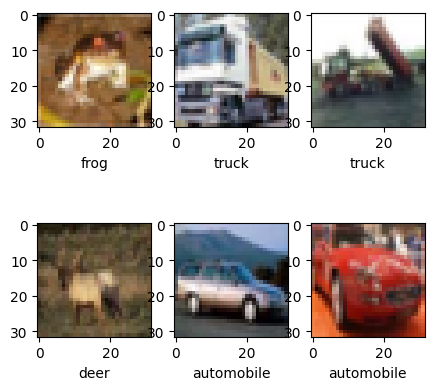

In [27]:
import matplotlib.pyplot as plt
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

plt.figure( figsize = (5,5))
for i in range(6):
  plt.subplot(2,3, i+1)
  plt.imshow(train_images[i])
  plt.xlabel(class_names[ np.argmax(y_train[i])])
plt.show()


#**Introduction to ResNet (Residual Networks)**

ResNet, short for Residual Networks, is a type of deep neural network architecture designed to overcome challenges faced by very deep neural networks during training. It was introduced by Kaiming He, Xiangyu Zhang, Shaoqing Ren, and Jian Sun in their 2016 paper titled "Deep Residual Learning for Image Recognition."
### Residual Learning:
ResNet introduces the concept of residual learning, where each layer is reformulated as learning the residual with respect to the output of the previous layer. This is achieved by using skip connections, or shortcuts, that bypass one or more layers. These shortcuts enable the network to learn identity mappings, making it easier to optimize and train deeper networks.


### Key Components:

1. **Residual Blocks:**
   - The fundamental building blocks of ResNet are residual blocks. Each block consists of two convolutional layers, typically with small filter sizes (e.g., 3x3).
   - The key innovation is the use of skip connections (shortcut connections) that bypass one or more layers. These connections enable the model to learn residual mappings, making it easier to train deep networks.

2. **Identity Shortcuts:**
   - The skip connections allow the input to be directly added to the output of one or more convolutional layers. This introduces the concept of identity shortcuts, where the network learns to optimize the residual (difference) between the input and output.

3. **Skip Connections:**
   - Skip connections help in mitigating the vanishing gradient problem by providing a direct path for gradient flow during backpropagation. This enables the training of very deep networks without loss of information.

### Network Architecture:

- ResNet architectures come in different variants, such as ResNet-18, ResNet-34, ResNet-50, and so on. The number in the name indicates the total number of layers, including both convolutional and fully connected layers.

- A common architecture involves stacking multiple residual blocks with increasing filters and downsampling layers (e.g., max pooling or strided convolutions) to reduce spatial dimensions.

- The architecture typically ends with a global average pooling layer and a fully connected layer for classification.

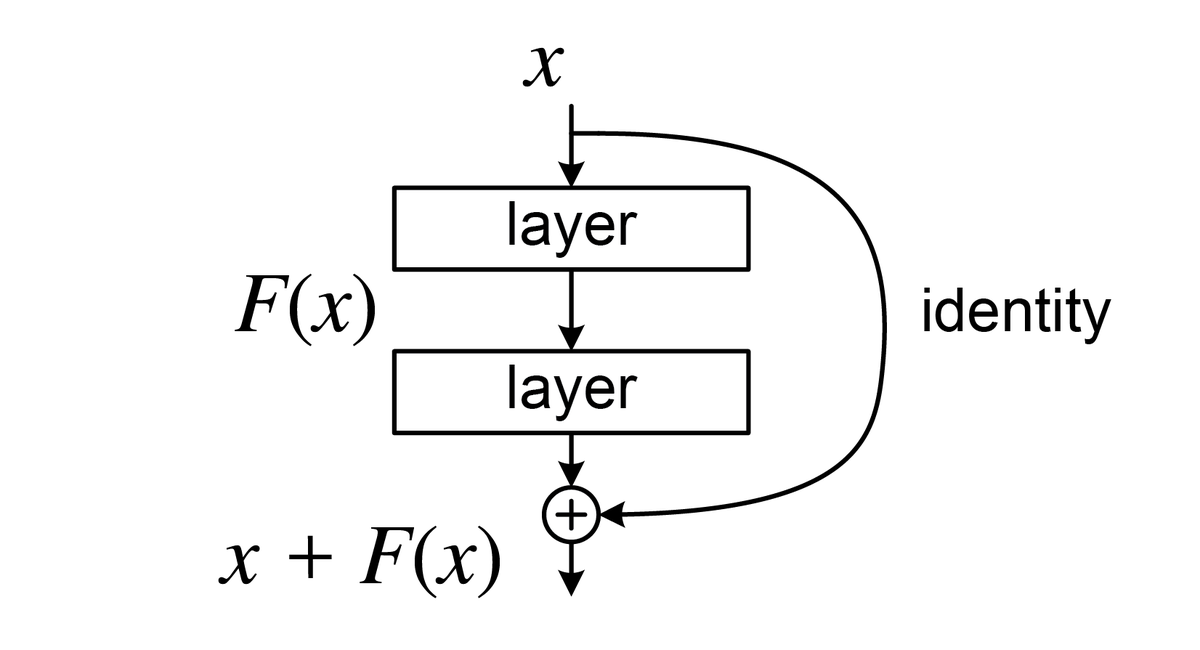

In [31]:
input = keras.Input(shape = (32,32,3) , name  = "images")
x = keras.layers.Conv2D(32, 3, activation = "relu")(input)
x = keras.layers.Conv2D(64, 3, activation = "relu")(x)
block_1_output = keras.layers.MaxPooling2D(3)(x)

model = keras.Model(input, block_1_output, name="toy_resnet")
model.summary()

Model: "toy_resnet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 images (InputLayer)         [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 9, 9, 64)          0         
 g2D)                                                            
                                                                 
Total params: 19392 (75.75 KB)
Trainable params: 19392 (75.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
x = keras.layers.Conv2D(64, 3, activation ="relu" , padding = "same")(block_1_output)
x = keras.layers.Conv2D(64, 3, activation = "relu" , padding = "same" )(x)
block_2_output = keras.layers.add([x, block_1_output])

x = keras.layers.Conv2D(64, 3, activation ="relu" , padding = "same")(block_2_output)
x = keras.layers.Conv2D(64, 3, activation = "relu" , padding = "same" )(x)
block_3_output = keras.layers.add([x, block_2_output])

x = keras.layers.Conv2D(64, 3, activation = "relu")(block_3_output)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(256 , activation = "relu")(x)
x = keras.layers.Dropout(0.5)(x)

output = keras.layers.Dense(10)(x)


In [41]:
model = keras.Model( inputs = input , outputs = output , name = "toy_resnet")
model.summary()

Model: "toy_resnet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 images (InputLayer)         [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d_4 (Conv2D)           (None, 30, 30, 32)           896       ['images[0][0]']              
                                                                                                  
 conv2d_5 (Conv2D)           (None, 28, 28, 64)           18496     ['conv2d_4[0][0]']            
                                                                                                  
 max_pooling2d_1 (MaxPoolin  (None, 9, 9, 64)             0         ['conv2d_5[0][0]']            
 g2D)                                                                                    

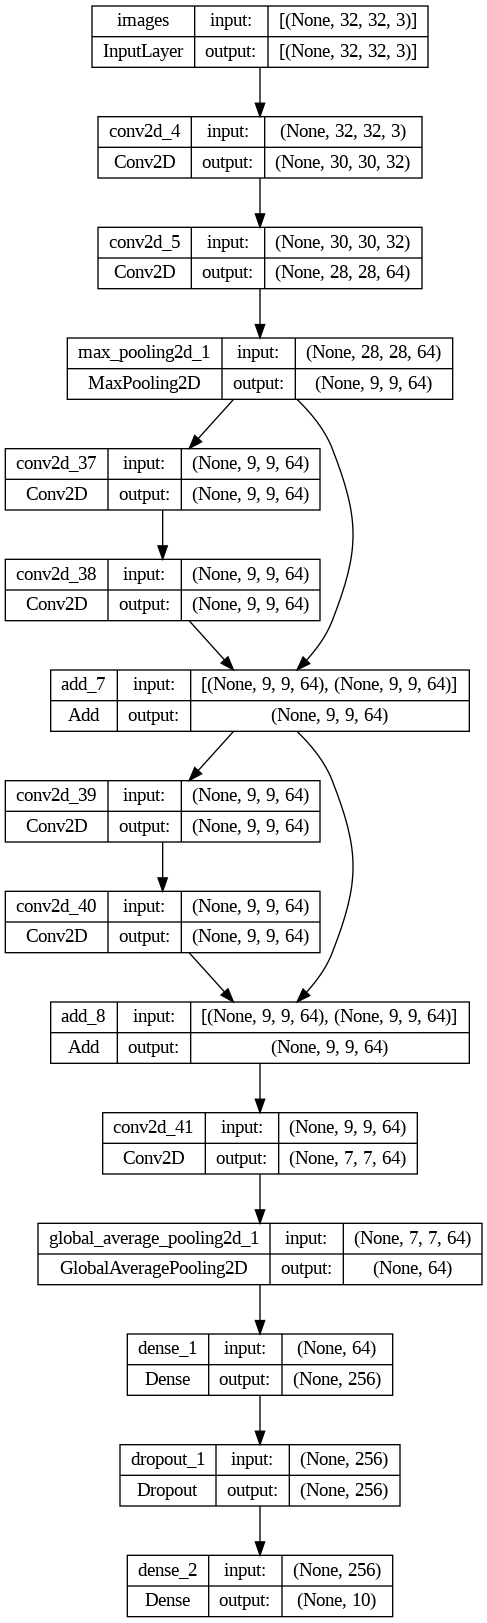

<Figure size 1000x1000 with 0 Axes>

In [44]:
plt.figure(figsize= (10,10))
keras.utils.plot_model( model , "mini-resnet.png" , show_shapes = True)

In [51]:
model.compile(
    optimizer = keras.optimizers.RMSprop(learning_rate=0.001),
    loss = keras.losses.CategoricalCrossentropy(from_logits = True),
    metrics = ["accuracy"]
)

In [52]:
model.fit(x_train[:1000] , y_train[:1000] , batch_size = 64 , epochs = 10 )

Epoch 1/10
16/16 [==============================] - 6s 311ms/step - loss: 2.3081 - accuracy: 0.0890
Epoch 2/10
16/16 [==============================] - 5s 344ms/step - loss: 2.2791 - accuracy: 0.1500
Epoch 3/10
16/16 [==============================] - 5s 272ms/step - loss: 2.2399 - accuracy: 0.1520
Epoch 4/10
16/16 [==============================] - 4s 258ms/step - loss: 2.1788 - accuracy: 0.1850
Epoch 5/10
16/16 [==============================] - 6s 359ms/step - loss: 2.1440 - accuracy: 0.1870
Epoch 6/10
16/16 [==============================] - 4s 259ms/step - loss: 2.1293 - accuracy: 0.2010
Epoch 7/10
16/16 [==============================] - 6s 364ms/step - loss: 2.0742 - accuracy: 0.2170
Epoch 8/10
16/16 [==============================] - 6s 371ms/step - loss: 2.0838 - accuracy: 0.2180
Epoch 9/10
16/16 [==============================] - 4s 264ms/step - loss: 1.9935 - accuracy: 0.2230
Epoch 10/10
16/16 [==============================] - 4s 274ms/step - loss: 2.0290 - accuracy: 0.2290

In [61]:
check = model.predict(x_test[:4])
for i in check:
  print(class_names[ np.argmax(i)])

1/1 [==============================] - 0s 27ms/step
frog
ship
ship
ship


In [60]:
class_names[np.argmax(y_train[0])]

'frog'